<h1 align="center">
    <img src="https://upload.wikimedia.org/wikipedia/it/archive/0/09/20160903181541%21Twitter_bird_logo.png" align="center" width="110"/>
</h1>

<h1 align="center">
    Twitter
</h1>

<h3 align="center"> Mining arguments from twitter topics</h3>

##### Libraries imports

In [1]:
import sys
import networkx as nx
import matplotlib.pyplot as plt

if '../../src/' not in sys.path:
    sys.path.append('../../src/')
    
from crawler.viz.drawer import GraphDrawer
from crawler.argumentation.convert import common
from crawler.argumentation.mine.from_twitter import get_debate_graph

## 1. Building the graphs

### Methodology
**Retrieving and filtering tweets**

Twitter APIs only allow you to download a finite number of random tweets given a topic. To build a conversation we need to:
1. retrieve the tweets
2. try to extend the tweets pool by making single requests (we can do single requests through fields in the tweet JSON by checking if the tweet is answering another tweet and retrieving such tweet), for example if a tweet is responding to another tweet not already in the tweet pool we can make a request and retrieve the tweet. By doing that we get a set of conversations
3. try to merge the conversations by checking if they have comments in common
4. Only keep the longest conversation

The final conversation is a set of comments linked to each other, comments that are responding to another comment in the conversation, are responded by another comment in the conversation or both.

**Nodes**

We can consider:
 - Each comment a node
 - Each user a node

**Edges**
  - between comments: exists an edge `(u, v)` between two nodes `u, v` if the comment associated to the node `u` is repsonding to the comment associated to the node `v`
  - between users: exists an edge `(u, v)` between two nodes `u, v` if the user of the comment of associated to the node `u` is repsonding to the user of the comment associated to the node `v`

**Weights**

The weight of an edge `(u, v)` is calculated using the text of the comments associated to the nodes `u` and `v`, as follows: </br> `weight = similarity(u,v) * sentiment(u) * sentiment(v)`

**Multiedges joining strategy**

We can decide whether to keep or join together multiple edges between the same two nodes. In case of join we only keep one edge whose weight is the average of the all the weights of the edges between the two nodes


### Parameters
To build the graph we need to set some parameters:
- **`query`** {str} -- Twitter topic (default: {'trump'})
- **`mode`** {str} -- What to use as graph nodes (default: {'comments'})
- **`save`** {bool} -- If True the output graph will be saved on the file system (default: {True})
- **`path`** {str} --  Output path of the generated graph (default: {None})
- **`multiedges`** {bool} -- Whether to leave (True) or join (False) multiple edges between the same two nodes (default: {False})
- **`framework`** {str} -- Type of the output argumentation framework  (default: {common.BWAF})
- **`verbose`** {bool} -- If True some stats will be printed on the standard output (default: {False})


### 1.1. Comments as nodes

In [2]:
%%time
comments_graph = get_debate_graph(
    query='coronavirus',
    language='en',
    mode='comments',
    save=False,
    multiedges=False,
    framework=common.BWAF,
    verbose=True
)

RESPONSE TWEETS:             35
MAX CONVERSATION LENGTH:     41
MAX USERS IN A CONVERSATION: 12 

NUMBER OF NODES IN THE GRAPH:      41
NUMBER OF EDGES IN THE GRAPH:      40
NUMBER OF NULL EDGES IN THE GRAPH: 30 

CPU times: user 2.35 s, sys: 221 ms, total: 2.57 s
Wall time: 40.8 s


### 1.2. Users as nodes


In [3]:
%%time
users_graph = get_debate_graph(
    query='coronavirus',
    language='en',
    mode='users',
    save=False,
    multiedges=False,
    framework=common.BWAF,
    verbose=True
)

NUMBER OF NODES IN THE GRAPH:      12
NUMBER OF EDGES IN THE GRAPH:      19
NUMBER OF NULL EDGES IN THE GRAPH: 13 

CPU times: user 84.9 ms, sys: 3.18 ms, total: 88.1 ms
Wall time: 108 ms


## 2. Visualization
Arguments and relationships visualized as a directed graph. We visualize the weights only for the second graph because it has less nodes

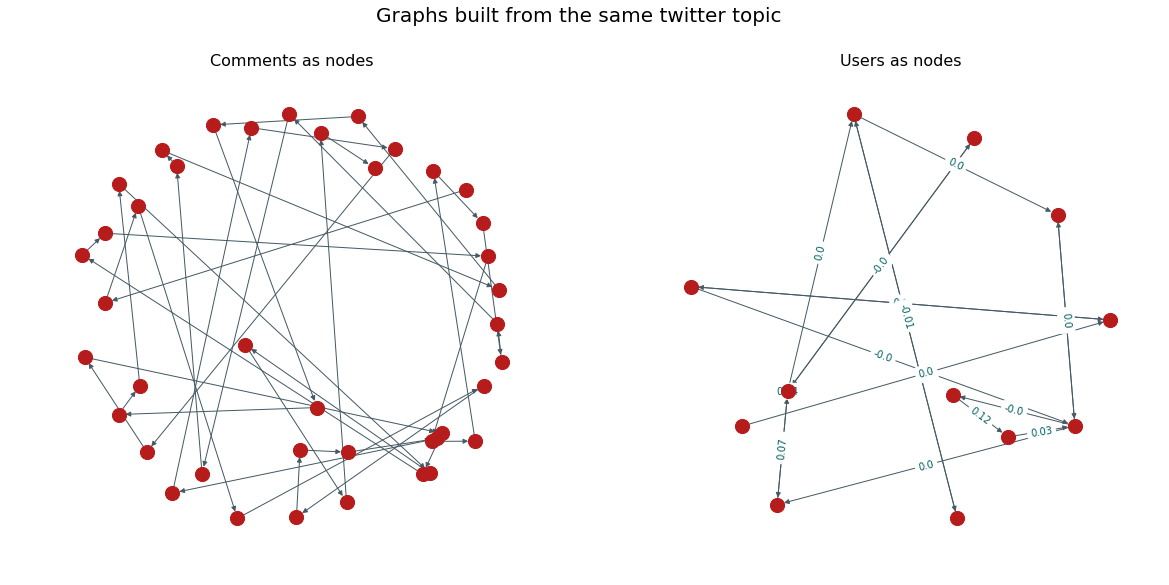

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,9))
fig.suptitle('Graphs built from the same twitter topic', fontsize=20)

comments_drawer = GraphDrawer(comments_graph)
users_drawer = GraphDrawer(users_graph, draw_edge_labels=True)

comments_drawer.draw(ax1, 'Comments as nodes')
users_drawer.draw(ax2, 'Users as nodes')